In [1]:
using(Plots)
theme(:ggplot2)
using(Random)


Queremos resolver 

$$\frac{dX_t}{dt} = (A_t - b X_t)X_t + \sigma X_t dW_t$$

com $X_0 = x_0$.



In [2]:
rng = MersenneTwister(1234)
nothing

In [65]:
T = 2.0 # tempo final 
t0 = 0.0
x0 = 0.25
α = 2
β = 0.1
σ = 0.25
dt = 0.01
N = Int(round(T/dt))
M = 100 # numero de simulações 
w0 = 0
nothing

In [66]:
ts = t0:dt:T
xs = Array{Float64}(undef,N+1,M)
ws = Array{Float64}(undef,N+1,M)

ws[1,:] .= w0
xs[1,:] .= x0

for i ∈ 1:M
    for j ∈ 2:N+1
        x_atual = xs[j-1,i] 
        dw = randn(rng) * √dt # sorteia o passo do passeio aleatório com variância dt
        aux1 = (α - β*x_atual)*x_atual
        aux2 = σ*x_atual
        dx = aux1*dt + aux2*dw # soma a parte estocástica com a parte clássica 
        # calculando novo passo 
        x_novo = x_atual + dt*dx 
        xs[j,i] = x_novo 
    end
end

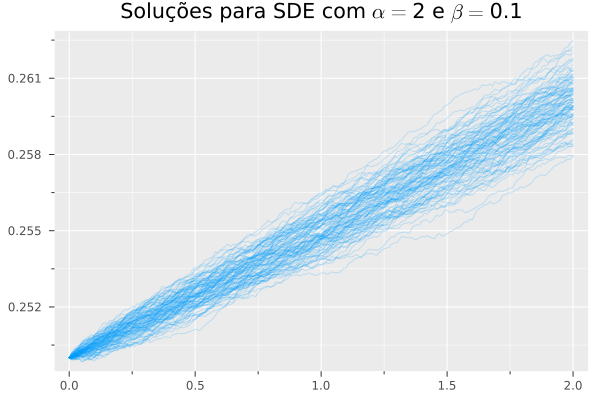

In [67]:
plot(ts,xs,alpha=0.2,label=false,color=1,title="Soluções para SDE com \$ \\alpha = \$$α e \$ \\beta =\$$β")

┌ Info: Saved animation to C:\Users\mevel\AppData\Local\Temp\jl_72BQH0JyH6.gif
└ @ Plots C:\Users\mevel\.julia\packages\Plots\Pe7wF\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\mevel\\AppData\\Local\\Temp\\jl_72BQH0JyH6.gif")
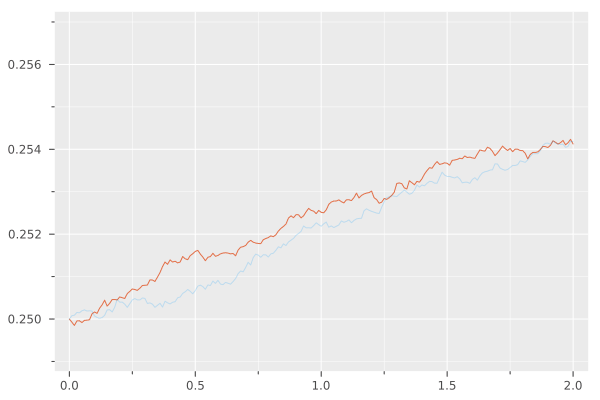

In [34]:
plot(ts,xs[:,1],color=2,label=false)

@gif for i ∈ 2:M
    plot!(ts,xs[:,i],color=1,label=false,alpha=0.2,ylim=(0.249,0.257))
end fps = 5